In [1]:
import os, sys, fitsio
sys.path.append('../')
import numpy as np
import healpy as hp
from run_DMASS import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import healpy as hp

In [3]:
rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'
figoutdir = rootdir + '/figure/'
os.system('mkdir '+figoutdir)

256

In [4]:
#import pickle
#filename = open('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/gold_st82_XD_no_full_tol1e5.pkl')
#pic = pickle.load(filename)

In [5]:
# import DMASS

#dmass = fitsio.read(rootdir+'spt.fits')
dmass = io.SearchAndCallFits(path = rootdir, keyword='dmass_spt_sys_v3')
#dmass = fitsio.read(rootdir+'dmass_spt_sys_v3.fits')
#dmass = dmass[dmass['EachProb_CMASS'] > 0.00]
print 'dmass sample size :', np.sum(dmass['CMASS_PROB'])


#dmass = cutcat20(dmass)
#dmass_st82 = fitsio.read(rootdir+'dmass_st82_0004.fits')
dmass_st82 = io.SearchAndCallFits(path = rootdir, keyword='gold_st82_prob')
dmass_st82 = dmass_st82[dmass_st82['EachProb_CMASS'] > 0.00]

cmass = fitsio.read('../output/sfd_train_photo_SamPle_nozband_ran10_3/train_sample_des.fits')


dmass = appendColumn(dmass, name = 'WEIGHT', value = dmass['EachProb_CMASS'], dtypes=float)
dmass_st82 = appendColumn(dmass_st82, name = 'WEIGHT', value = dmass_st82['EachProb_CMASS'], dtypes=float)

print 'dmass st82 sample size :', np.sum(dmass_st82['EachProb_CMASS'])
print 'cmass sample size :', cmass.size


--------------------------------
 calling catalog
--------------------------------
dmass_spt_sys_v3.fits
dmass sample size : 120874.72753482158

--------------------------------
 calling catalog
--------------------------------
gold_st82_prob.fits
dmass st82 sample size : 13002.574050557929
cmass sample size : 12639


In [6]:
cmass.size, dmass_st82.size, dmass.size

(12639, 694475, 6777228)

In [10]:
random = io.SearchAndCallFits(path = rootdir, keyword='random_x50_dmass_spt_masked.fits')


--------------------------------
 calling catalog
--------------------------------
random_x50_dmass_spt_masked.fits


In [9]:
# calling map 
GoldMask = callingEliGoldMask()
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = cutcat20(GoldMask_spt)
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

In [20]:
"""
random = uniform_random_on_sphere(GoldMask, size = dmass.size/10)
random = Cuts.keepGoodRegion(random)
#rand = Cuts.keepY1GoldRegion(rand)
rand = random[ random['DEC'] < -3.0 ]
rand_st82 = random[ random['DEC'] > -3.0 ]
#rand2 = cutcat20(rand2)


random = uniform_random_on_sphere(GoldMask, size = 10 * dmass.size)
random = Cuts.keepGoodRegion(random)
#rand = Cuts.keepY1GoldRegion(rand)
rand2 = random[ random['DEC'] < -3.0 ]
rand_st82_2 = random[ random['DEC'] > -3.0 ]
#rand2 = cutcat20(rand2)

print rand.size, dmass.size
#rand_train = uniform_random_on_sphere(clean_cmass_data_des, size = 10 * clean_cmass_data_des.size)
#rand_train = Cuts.keepGoodRegion(rand_train)
random = None
"""


42745 6777228


In [54]:
#tree corr
from systematics_module.corr import angular_correlation, angular_correlation_poisson
angular_correlation(data = dmass, rand = rand2, nbins=10, njack = 50, weight = [True, False], 
                    suffix = '_dmass_spt_nbins10_jk50', dir = rootdir+'/act/')
#angular_correlation(data = gold_st82_prob_ran10, rand = rand_st82, nbins=10, njack = 30, weight = [True, True], 
#                    suffix = '_gold_st82_nbins10_jk30'.format(i+1), dir = rootdir+'/act/')

TypeError: angular_correlation_poisson() got an unexpected keyword argument 'njack'

In [57]:
dmass[randind].size, rand2.size

(677722, 4281839)

In [12]:
from systematics_module.corr import angular_correlation, angular_correlation_poisson
dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
angular_correlation_poisson(data = dmass, rand = random, nbins=10, 
                            weight_data = True, weight_rand = None,
                    suffix = '_dmass_spt_pcut00_nbins10_jk50', dir = rootdir+'/act/')

saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_spt_pcut00_nbins10_jk50.txt


In [13]:
dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
pcut = dmass['EachProb_CMASS'] > 0.01
angular_correlation_poisson(data = dmass[pcut], rand = random, nbins=10, 
                            weight_data = True, weight_rand = None,
                    suffix = '_dmass_spt_pcut01_nbins10_jk50', dir = rootdir+'/act/')

saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_spt_pcut01_nbins10_jk50.txt


In [14]:
dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
pcut = dmass['EachProb_CMASS'] > 0.02
angular_correlation_poisson(data = dmass[pcut], rand = random, nbins=10, 
                            weight_data = True, weight_rand = None,
                    suffix = '_dmass_spt_pcut02_nbins10_jk50', dir = rootdir+'/act/')

saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_spt_pcut02_nbins10_jk50.txt


In [388]:
#tree corr
from systematics_module.corr import angular_correlation
angular_correlation(data = gold_spt_prob_ran10, rand = GoldMask_spt, nbins=10, njack = 100, weight = [True, False], 
                    suffix = '_gold_spt_nbins10_jk100'.format(i+1), dir = rootdir+'/act/')
#angular_correlation(data = gold_st82_prob_ran10, rand = rand_st82, nbins=10, njack = 30, weight = [True, True], 
#                    suffix = '_gold_st82_nbins10_jk30'.format(i+1), dir = rootdir+'/act/')

calculate angular correlation function
X (1661, 2)  centers (100, 2)  tol=1e-05  maxiter=200
18 iterations  cluster sizes: [17 12 13 18 21 16 32 11 23 21 24 16  6 11 14 16 25 27 28 18 25  9 20 12
 14 13  8 31 12 21 25  5 16 28 23 18 21 24 20 15 42 17  3 14 16 22 26 13
  6 12 31 25  8 24 18 16 11 11 17 23 11 25 25 17 11 31 22 11 13 15 20 11
 14  4 13  8  7 22 11 17  4 18 12 18 26 15 16 27  3  7  7 18  9 13 15  5
 15 10 15 16]
X (690479, 2)  centers (100, 2)  tol=1e-05  maxiter=200
179 iterations  cluster sizes: [6926 5704 7145 7923 7032 7670 8384 6502 8010 5031 8027 9000 5640 7963
 7386 8019 7275 7963 8986 5912 6656 4430 6926 7242 6970 8227 7005 8661
 6574 8067 7961 4286 7685 9835 4900 7887 6698 8329 8722 6657 7991 7479
 4858 8356 7103 7926 7168 5899 3941 8025 7077 8529 4648 8352 8406 7030
 7473 7082 7120 7530 5337 5838 6577 6995 6532 7290 7710 5826 6247 7349
 7883 6683 5531 4089 7092 5794 3755 4307 7136 6290 3735 6687 5089 7477
 7379 7915 6368 6976 4039 4933 8279 7487 8640 6911 6783 42

In [396]:
angular_correlation(data = gold_st82_prob_ran10, rand = rand_st82, nbins=10, njack = 100, weight = [True, False], 
                    suffix = '_gold_st82_nbins10_jk100'.format(i+1), dir = rootdir+'/act/')

calculate angular correlation function
X (1000, 2)  centers (100, 2)  tol=1e-05  maxiter=200
19 iterations  cluster sizes: [ 4 17  6  9  9 17  6  7 14  7 16 13  6 17 14  5 11 17  9  5 11 11  9 12
 15  7 17 12  6 15  9  6 21  0 19 17  8 13  9 14  8 10  7  7  3  6  7  9
  8  7  9 14  7  7  2  9  7  8  7 11  9  8 11 14  8  9 13  5 10 13  6  2
 14 16 18  4 14  8  8 15  7  5  8 12 18 22 10  8  8 14  4 13  9  6  7  9
  9 18  8  7]
X (72447, 2)  centers (100, 2)  tol=1e-05  maxiter=200
97 iterations  cluster sizes: [ 700  879  637  567  699 1013  535  614  887  592  892  833  598  743
  777  929  834 1126  741  596  836  801  698  852  709  850 1157  913
  610  768  783  780  639  421  727  506  802  927  546  740  476  652
  573  675  421  438  881  668  458  482  869  949  650  729  823  597
  670  382  639  782  818  782  746  510  659  717  751  579  719  771
  527  528  842  994  857  727  862  757  549 1035  881  651  724  674
  992  846  727  766  804  745  484  712  596  668  633  694

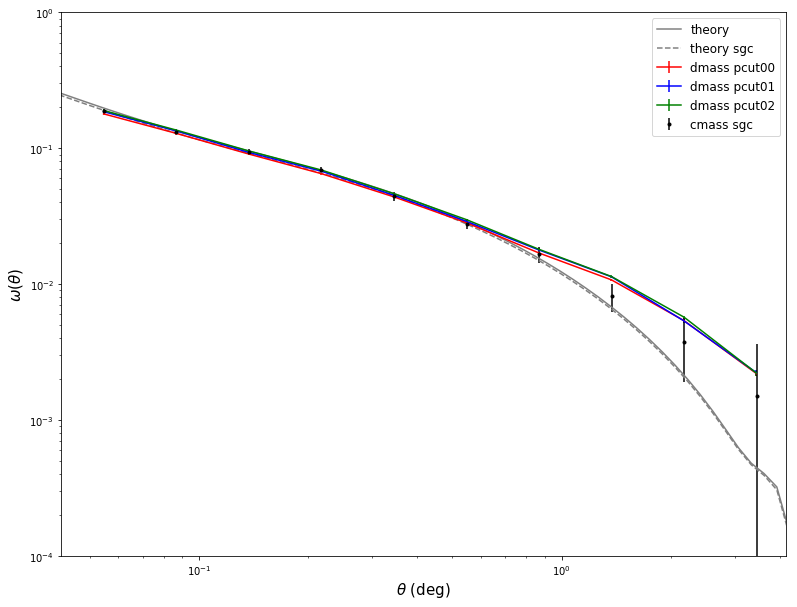

In [15]:
import scipy

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

#_, theory_bias = np.loadtxt('../data_txt/acf_cmass_sgc_theory_bias.txt', unpack=True)
#meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_gold_st82_nbins10_jk100.txt', unpack=True)
meanr,  xi,  xi_err  = np.loadtxt(rootdir+'/act//acf_auto_poisson_dmass_spt_pcut00_nbins10_jk50.txt', unpack=True)
meanr2, xi2, xi_err2 = np.loadtxt(rootdir+'/act//acf_auto_poisson_dmass_spt_pcut01_nbins10_jk50.txt', unpack=True)
meanr3, xi3, xi_err3 = np.loadtxt(rootdir+'/act//acf_auto_poisson_dmass_spt_pcut02_nbins10_jk50.txt', unpack=True)

theory_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_interp = theory_interp(meanr)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(meanr)

nzs_ratio = theory_sgc_interp/theory_interp


meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')




fig, ax = plt.subplots(figsize = (13, 10))


ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', label='dmass pcut00')
ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass pcut01')
ax.errorbar(meanr3, xi3, yerr = xi_err3, fmt = '-', color='g', label='dmass pcut02')
ax.errorbar(meanr_sgc, xi_sgc, yerr = xi_err_sgc, fmt = 'k.', color='r', label='cmass sgc')

ax.plot(theta_th, theory, '-', color='grey', label='theory')
ax.plot(theta_th, theory_sgc, '--', color='grey', label='theory sgc')
#ax.plot(theta_th, theta_th*theory_bias, '--', color='green', label='theory bias')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-4,1)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)

In [14]:
train_sample = esutil.io.read(rootdir + 'cmass_in_st82.fits')

mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], dmass_st82['RA'], \
                                     dmass_st82['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des, nocmass = dmass_st82[cmass_mask], dmass_st82[~cmass_mask]

In [15]:
pbinsmall, steps = np.linspace(0, 0.02, 21,retstep=1 )
pbinbig, stepb = np.linspace(0.02, 1, 197, retstep=1 )
pth_bin = np.hstack([pbinsmall, pbinbig[1:]])
pcenters = pbinsmall[:-1] + steps/2.
pcenterb = pbinbig[:-1] + stepb/2.
pcenter = np.hstack([pcenters, pcenterb[1:]])

In [16]:
pth_bin[1:16]

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015])

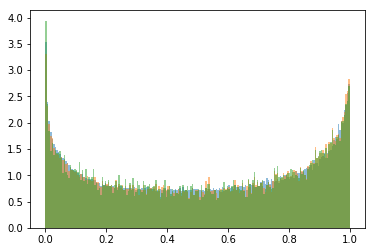

In [21]:
fig, ax = plt.subplots()
_ = ax.hist( dmass['EachProb_CMASS'], bins = np.linspace(0, 1, 201), 
            normed=True, alpha= 0.5, weights = dmass['WEIGHT_SYS'] )
_ = ax.hist( dmass_st82['EachProb_CMASS'], bins = np.linspace(0, 1, 201), 
            normed=True, alpha= 0.5, weights = dmass_st82['EachProb_CMASS'] )
_ = ax.hist( clean_cmass_data_des['EachProb_CMASS'], bins = np.linspace(0, 1, 201), normed=True, alpha= 0.5 )

0.0 13002.574050557929 120874.72753482158
0.001 12943.332168479816 120273.71841185627
0.002 12899.13855838352 119835.14115829843
0.003 12859.278581022727 119444.92961391063
0.004 12822.23997491804 119085.40429117231
0.005 12787.72068438419 118747.4249401787
0.006 12754.65479369002 118430.91253205613
0.007 12723.270644199098 118132.02391346914
0.008 12693.113656763411 117842.22952068856
0.009000000000000001 12663.762457028732 117564.94898776911
0.01 12637.112833275674 117292.90214602613
0.011 12610.083287663789 117032.40860440915
0.012 12584.401410643746 116783.25352268791
0.013000000000000001 12558.620899137746 116537.49685142006
0.014 12533.135557325542 116296.9072520335
0.015 12508.253516628829 116061.14827466865


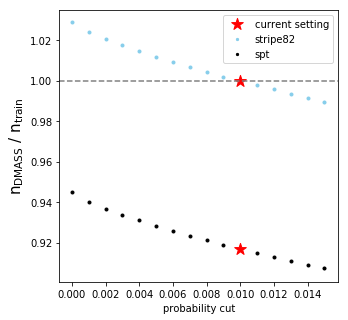

In [23]:
cmass_numdensity = cmass.size * 1./rand_st82_2.size

fig, ax = plt.subplots(figsize = (5,5))

i=0
for pc in pth_bin[:16] :
    #print i,
    
    #dmass_spt_pc, _ = resampleWithPth( gold_spt_prob_ran, pstart = pc)
    dc = dmass[dmass['EachProb_CMASS'] > pc] 
    ds82 = dmass_st82[dmass_st82['EachProb_CMASS'] > pc] 
    #weight = np.sum(dc['EachProb_CMASS'] )
    weight = np.sum(dc['EachProb_CMASS'] )
    weight82 = np.sum(ds82['EachProb_CMASS'] )
    #print weight, weight82, rand2.size, rand_
    numdensity = weight*1./rand2.size * 1./cmass_numdensity
    numdensity_s82 = weight82*1./rand_st82_2.size * 1./cmass_numdensity
    if pc == 0.01 : 
        ax.scatter(0.01, numdensity_s82, marker='*', color='red', s=150)
        ax.scatter(0.01, numdensity, marker='*', color='red', s=150, label = 'current setting')
    else :     
        ax.plot(pc, numdensity, 'k.')
        ax.plot(pc, numdensity_s82, '.', c='skyblue')
    print pc, weight82, weight
    
    i+=1
    
ax.axhline(y = 1.0, ls = '--', color='grey')
ax.scatter(pc, numdensity_s82, marker='o', color='skyblue', s=5, label = 'stripe82')
ax.scatter(pc, numdensity, marker='o', color='black', s=5, label = 'spt')

#ax.scatter(0.01, numdensity_s82, marker='*', color='red', s=150)
#ax.scatter(0.01, numdensity, marker='*', color='red', s=150, label = 'current setting')
ax.set_xlabel('probability cut')
ax.set_ylabel(r'$\rm n_{\rm DMASS}$ / $\rm n_{\rm train}$', fontsize = 15)
#ax.text(0.007, 0.925, 'bin size = 0.0001')
ax.legend()
fig.savefig(figoutdir + 'prob_test_num_density.png')    

In [12]:
pth_bin[:16]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015])

In [16]:
pbinsmall, steps = np.linspace(0, 0.02, 21,retstep=1 )
pbinbig, stepb = np.linspace(0.02, 1, 197, retstep=1 )
pth_bin = np.hstack([pbinsmall, pbinbig[1:]])
pcenters = pbinsmall[:-1] + steps/2.
pcenterb = pbinbig[:-1] + stepb/2.
pcenter = np.hstack([pcenters, pcenterb[1:]])

In [23]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = rootdir+'/act/'
os.system('mkdir '+basedir)

dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
for pc in pth_bin[0:21] :
    #dc = dmass[dmass['WEIGHT'] > pc] 
    #randind = np.random.choice( range(dc.size), size = dc.size/10)
    
    
    pcut = dmass['EachProb_CMASS'] > pc
    angular_correlation_poisson(data = dmass[pcut], rand = random, nbins=10, 
                    weight_data = True, weight_rand = None,
                    suffix = '_dmass_pcut{:0.3f}_nbins10_jk50'.format(pc), dir = rootdir+'/act/')
    print 'cut :', pc,  'sample size : ', dmass[pcut].size
    #angular_correlation(data = dmass[pcut], rand = random, nbins=10, njack = 100, weight=[True, False],
    #                    suffix = '_dmass_pcut{:0.3f}_nbins10_jk100'.format(pc), dir = basedir)

saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.000_nbins10_jk50.txt
cut : 0.0 sample size :  6777228
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.001_nbins10_jk50.txt
cut : 0.001 sample size :  1534301
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.002_nbins10_jk50.txt
cut : 0.002 sample size :  1227405
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.003_nbins10_jk50.txt
cut : 0.003 sample size :  1068655
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.004_nbins10_jk50.txt
cut : 0.004 sample size :  965011
saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_pcut0.005_nbins

In [40]:
len(pth_bin[:16]), len(filenames)

(16, 16)

err db, db / br1, brmin, br2 : 0.028844271515027886 0.038431122021409525 1.005048269689014 1.019592032914497 1.0338925412040418
err db, db / br1, brmin, br2 : 0.02889359647580836 0.03236377416345371 1.0018985777772271 1.0164480475295652 1.0307921742530355
err db, db / br1, brmin, br2 : 0.024157447446197855 0.023619703889090626 0.9998199477833982 1.0119509913833735 1.023977395229596
err db, db / br1, brmin, br2 : 0.024315620434039453 0.023619703889090626 0.9997399141672777 1.0119509913833735 1.0240555346013172
err db, db / br1, brmin, br2 : 0.028039333787853726 0.017569308515205773 0.9947652545109908 1.0088625083291294 1.0228045882988446
err db, db / br1, brmin, br2 : 0.02768940781208118 0.017101588633391174 0.9946848141878487 1.008624540992801 1.0223742219999299
err db, db / br1, brmin, br2 : 0.027486157025174873 0.017413438664629632 0.9949663268665526 1.0087831921209538 1.0224524838917275
err db, db / br1, brmin, br2 : 0.02793257600779353 0.002595459042053383 0.9872157408509028 1.0012

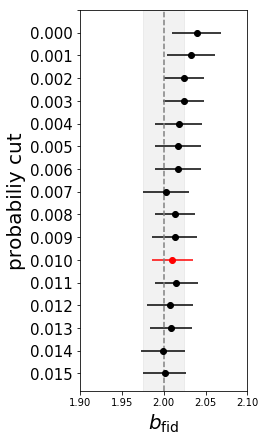

In [61]:
import scipy

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (3,7))
brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

labels_SP = ['{:0.3f}'.format(pc) for pc in pth_bin[:16]]

filenames = [ basedir+'acf_auto_poisson_dmass_pcut{:0.3f}_nbins10_jk50.txt'.format(pc) for pc in pth_bin[:16]]
#covnames = [ basedir+'acf_auto_dmass_pcut{:0.5f}_nbins10_jk50.cov'.format(pc) for pc in pth_bin[::5][:23]]
covnames = [ basedir +'acf_auto_dmass_pcut{:0.3f}_nbins10_jk100.cov'.format(pc) for pc in pth_bin[:16]]

for j in range(1, len(pth_bin[:16])+1):
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    if pth_bin[:16][j-1] == 0.01 : 
        color = 'r'
        ax.axvspan(2.- err_brelw*2., 2.+err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=2, color = 'grey', ls='--')
    else : color = 'k'  
   
    ax.errorbar(2*brelw, len(labels_SP)-j, xerr =err_brelw*2., fmt='-o', color=color)
    
ax.set_xlabel(r'$b_{\rm fid}$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(1.9, 2.1)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(len(labels_SP)+1))
ax.set_ylabel('probabiliy cut', fontsize = 20)
labels = labels_SP[::-1] + ['']
ax.set_yticklabels( labels, fontsize = 15) 
fig.savefig(figoutdir + 'sys_bias_pcut.pdf')
print 'pic save to ', figoutdir + 'sys_bias_pcut.png'






In [ ]:
fig, ax = plt.subplots()
_ = ax.hist( dmass_spt_pc['EachProb_CMASS'], bins = pth_bin[:101])
ax.set_xlabel('Probability')
ax.set_ylabel('N galaxy')
ax.text(0.005, 175, 'bin size = 0.0001', fontsize = 12)

In [ ]:
fig, ax = plt.subplots()
_ = ax.hist( dmass_spt_pc['EachProb_CMASS'], bins = pth_bin)

In [ ]:
from systematics_module.contCorrection import doVisualization_ngal
from run_systematics import sys_iteration, fitting_SP, sys_ngal, weightmultiply, fitting_allSP, calling_sysMap, maskingCatalogSP

In [ ]:
properties = ['GE', 'NSTARS_allband']
sysMap = calling_sysMap( properties=properties, kind='SPT', nside=4096 )

In [ ]:
sysoutdir = rootdir+'/sys/'

In [ ]:
for pc in pth_bin[::5][:23]:
#pc = 0
    suffix = 'pcut_{:0.4f}'.format(pc)

    for p in ['GE', 'NSTARS_allband'] : 
        
        dc = dmass_spt_pc[dmass_spt_pc['EachProb_CMASS'] > pc ]
        print pc, dc.size
        sys_ngal(cat1 = dc, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap, 
             FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
             reweight= None, nside = 4096,
             suffix=suffix, outdir=sysoutdir)

        doVisualization_ngal(property = p, nside = 4096, kind = 'SPT', suffix=suffix, \
                             inputdir=sysoutdir, outdir=figoutdir)